![](img/2022-12-09-20-51-09.png)

In [30]:
from sympy import *
from sympy.physics.continuum_mechanics.beam import Beam

L=4
E, I = symbols('E, I')
R1, R2 = symbols('R1, R2')
bm = Beam(L, E, I)
bm.apply_load(R1, 0, -1)
bm.apply_load(2, 0, 0, end=2)
bm.apply_load(10, 2, -1)
bm.apply_load(R2, L, -1)  # P

# find reaction load at A, B
bm.bc_deflection = [(0, 0), (4, 0)]
bm.solve_for_reaction_loads(R1, R2)
bm.reaction_loads

{R1: -8, R2: -6}

In [29]:
# I = sum(bh^3/12)
I1 = 200*(290**3)/12
I2 = 190*(250**3)/12
i = (I1 - I2)/(1000**4)
print(f"{i = :.3e}")

i = 1.591e-04


In [23]:
bm.bending_moment()

8*SingularityFunction(x, 0, 1) - SingularityFunction(x, 0, 2) - 10*SingularityFunction(x, 2, 1) + SingularityFunction(x, 2, 2) + 6*SingularityFunction(x, 4, 1)

In [24]:
bm.slope()

(-4*SingularityFunction(x, 0, 2) + SingularityFunction(x, 0, 3)/3 + 5*SingularityFunction(x, 2, 2) - SingularityFunction(x, 2, 3)/3 - 3*SingularityFunction(x, 4, 2) + 13)/(E*I)

In [17]:
bm.deflection()

(13*x - 4*SingularityFunction(x, 0, 3)/3 + SingularityFunction(x, 0, 4)/12 + 5*SingularityFunction(x, 2, 3)/3 - SingularityFunction(x, 2, 4)/12 - SingularityFunction(x, 4, 3))/(E*I)

In [28]:
deflection = bm.deflection().subs({E:20e9, I:i, symbols('x'):2})
print(f"{deflection = :.3e}")

deflection = 5.238e-6


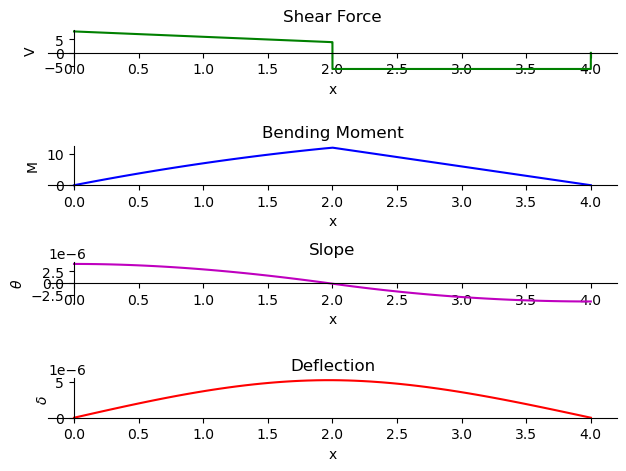

In [3]:
bm.plot_loading_results(subs={E:20e9, I:i})